In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv ('/content/titanic - titanic.csv')
df

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


# New Section

**1. The frequency of each of the classes.**


In [6]:
c=df['Class'].value_counts()
c

Crew    885
3rd     706
1st     325
2nd     285
Name: Class, dtype: int64

**2. Representing the data in the form of 1 and 0 instead of male and female.**

In [7]:
dummy = pd.get_dummies(df['Sex'])

In [8]:
df2 = pd.concat((df,dummy),axis=1)

In [9]:
df2

,Class,Sex,Age,Survived,Female,Male
0,3rd,Male,Child,No,0,1
1,3rd,Male,Child,No,0,1
2,3rd,Male,Child,No,0,1
3,3rd,Male,Child,No,0,1
4,3rd,Male,Child,No,0,1
...,...,...,...,...,...,...
2196,Crew,Female,Adult,Yes,1,0
2197,Crew,Female,Adult,Yes,1,0
2198,Crew,Female,Adult,Yes,1,0
2199,Crew,Female,Adult,Yes,1,0


In [10]:
#df2.drop('Sex',axis=1)

In [11]:
df2.drop('Female',axis=1,inplace=True)

In [12]:
df2

,Class,Sex,Age,Survived,Male
0,3rd,Male,Child,No,1
1,3rd,Male,Child,No,1
2,3rd,Male,Child,No,1
3,3rd,Male,Child,No,1
4,3rd,Male,Child,No,1
...,...,...,...,...,...
2196,Crew,Female,Adult,Yes,0
2197,Crew,Female,Adult,Yes,0
2198,Crew,Female,Adult,Yes,0
2199,Crew,Female,Adult,Yes,0


In [13]:
df2.rename(columns={"Male":"Sex1"},inplace=True)

In [14]:
df2

,Class,Sex,Age,Survived,Sex1
0,3rd,Male,Child,No,1
1,3rd,Male,Child,No,1
2,3rd,Male,Child,No,1
3,3rd,Male,Child,No,1
4,3rd,Male,Child,No,1
...,...,...,...,...,...
2196,Crew,Female,Adult,Yes,0
2197,Crew,Female,Adult,Yes,0
2198,Crew,Female,Adult,Yes,0
2199,Crew,Female,Adult,Yes,0


**3. For which category survival rate is more male or female**

In [15]:
dummy=pd.get_dummies(df['Survived'])

In [16]:
dummy

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2196,0,1
2197,0,1
2198,0,1
2199,0,1


In [17]:
df = pd.concat((df2,dummy),axis=1)

In [18]:
df

,Class,Sex,Age,Survived,Sex1,No,Yes
0,3rd,Male,Child,No,1,1,0
1,3rd,Male,Child,No,1,1,0
2,3rd,Male,Child,No,1,1,0
3,3rd,Male,Child,No,1,1,0
4,3rd,Male,Child,No,1,1,0
...,...,...,...,...,...,...,...
2196,Crew,Female,Adult,Yes,0,0,1
2197,Crew,Female,Adult,Yes,0,0,1
2198,Crew,Female,Adult,Yes,0,0,1
2199,Crew,Female,Adult,Yes,0,0,1


In [19]:
#df.drop(['Survived','No'],axis=1)

In [20]:
df.rename(columns={"Yes":"Survived1"},inplace=True)

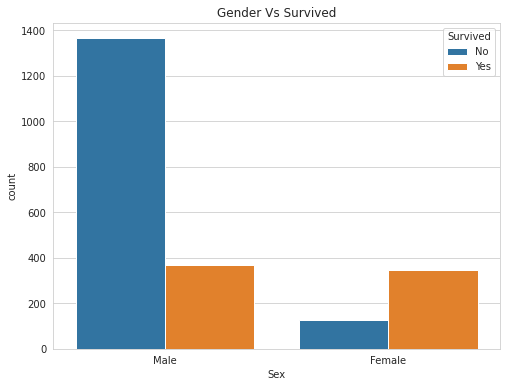

In [21]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(data=df,x="Sex", hue="Survived")
plt.title("Gender Vs Survived")
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived1'>

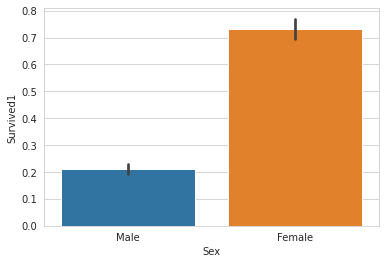

In [22]:
from locale import normalize
sns.barplot(x="Sex", y="Survived1", data=df)

#from below graph we can say that the survival rate of Male is 21.1% and 72.2% is of Female.
#so we can conclude that survival rate of Female is more than Male group.

**4. For which age group survival rate is more child/adult?**

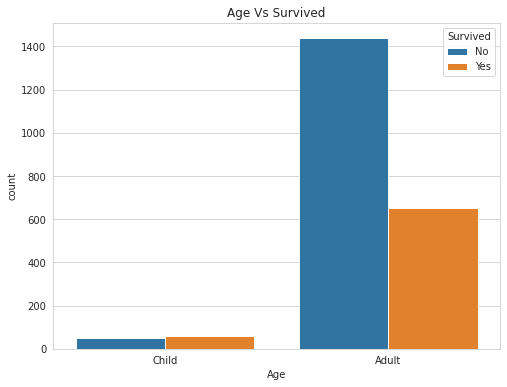

In [23]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(data=df, x="Age", hue="Survived")
plt.title("Age Vs Survived")
plt.show()

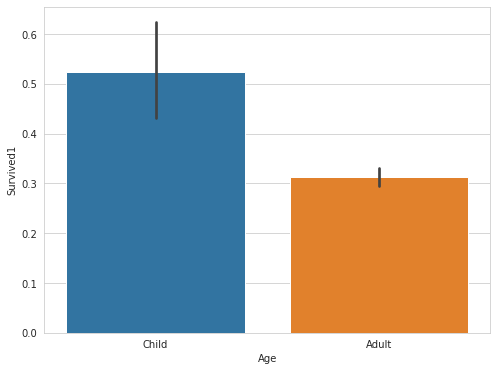

In [24]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(data=df, x="Age", y="Survived1")
plt.show()

**5. For which class the percentage of survival was less 1st, 2nd, 3rd?**

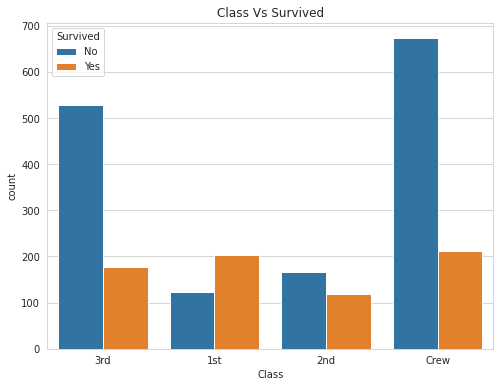

In [25]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(data=df, x="Class", hue="Survived")
plt.title("Class Vs Survived")
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Survived1'>

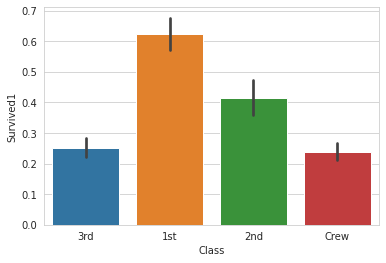

In [26]:
sns.barplot(x="Class", y="Survived1", data=df)
#Percentage of 1st class who Survived: 62%
#percentage of 2nd class who Survived: 41%
#percentage of 3rd class who Survived: 25%
#percentage of Crew who Survived: 24%
#3rd class survival rate was less.


In [27]:
df

,Class,Sex,Age,Survived,Sex1,No,Survived1
0,3rd,Male,Child,No,1,1,0
1,3rd,Male,Child,No,1,1,0
2,3rd,Male,Child,No,1,1,0
3,3rd,Male,Child,No,1,1,0
4,3rd,Male,Child,No,1,1,0
...,...,...,...,...,...,...,...
2196,Crew,Female,Adult,Yes,0,0,1
2197,Crew,Female,Adult,Yes,0,0,1
2198,Crew,Female,Adult,Yes,0,0,1
2199,Crew,Female,Adult,Yes,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Class      2201 non-null   object
 1   Sex        2201 non-null   object
 2   Age        2201 non-null   object
 3   Survived   2201 non-null   object
 4   Sex1       2201 non-null   uint8 
 5   No         2201 non-null   uint8 
 6   Survived1  2201 non-null   uint8 
dtypes: object(4), uint8(3)
memory usage: 75.4+ KB
